In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import datetime
from itertools import islice
from datetime import date
import time

In [2]:
head= [ 'No','Doc','Bearing1 X','Bearing1 Y','Bearing2 X','Bearing2 Y','Bearing3 X','Bearing3 Y','Bearing4 X','Bearing4 Y' ]
head2= [0,1,2,3,4,5,6,7,8,9]
head3= [0,1,2,3]
headT= [ 'Time','Bearing1 X','Bearing1 Y','Bearing2 X','Bearing2 Y','Bearing3 X','Bearing3 Y','Bearing4 X','Bearing4 Y' ]
classes= ['Healty', 'Half Healty', 'Inner Bearing Failure', 'Roller Bearing Failure', 'Outer Race Failure', 'General Failure']

In [3]:
def read_txt(folderIn, folderOut, outFile, convCSV, cfrom, until):
    
    countL= 0
    
    for file in os.listdir(folderIn):
        num= int(file.replace(".txt", "").lstrip("0"))
        
        if num>= cfrom and num<= until:
                    
            counter= 0
            with open(folderIn+file, 'r') as infile:
                temp = infile.read()
                
                coList = temp.split("\n")
                for i in coList: 
                    if i: 
                        counter += 1
                infile.close()
            with open(folderIn+file, 'r') as infile:
                lines_gen = islice(infile,counter)
                output = open(folderOut+outFile,'a')            
                for lines in lines_gen:
                    filen = str(countL) + "," + file.replace(".txt", "").lstrip("0") + ","
                    countL+= 1  
                    output.write(filen)                
                    for n in lines:                    
                        if n== "\t":
                            output.write(",")
                        else:
                            output.write(n)
                output.close()
                infile.close()
        else:
            continue
            
    if convCSV== True:
        read_file = pd.read_csv (filepath_or_buffer = folderOut+outFile, float_precision= 'round_trip', names= head2)
        renf= outFile.replace(".txt", ".csv")
        read_file.to_csv (path_or_buf= folderOut+renf, index=None)
    else:
        read_file = pd.read_csv (filepath_or_buffer = folderOut+outFile, float_precision= 'round_trip', names= head2)
            
    return read_file

In [ ]:
def read_txt_temp(folderIn, folderOut, outFile, convCSV, date, delta):
        
    for file in os.listdir(folderIn):
        counter= 0
        timeCounter= date
        with open(folderIn+file, 'r') as infile:
            temp = infile.read()
            coList = temp.split("\n")
            for i in coList: 
                if i: 
                    counter += 1
            infile.close()
        with open(folderIn+file, 'r') as infile:
            lines_gen = islice(infile,counter)
            output = open(folderOut+outFile,'a')            
            for lines in lines_gen:
                dt= date.strftime('%d/%m/%Y %H:%M:%S')
                output.write(dt+",")
                for n in lines:                    
                    if n== "\t":
                        output.write(",")
                    else:
                        output.write(n)
                date= date + datetime.timedelta(minutes = delta)
            output.close()
            infile.close()
    
    if convCSV== True:
        read_file = pd.read_csv (filepath_or_buffer = folderOut+outFile, float_precision= 'round_trip', names= headT)
        renf= outFile.replace(".txt", ".csv")
        read_file.to_csv (path_or_buf= folderOut+renf, index=None)
    else:
        read_file = pd.read_csv (filepath_or_buffer = folderOut+outFile, float_precision= 'round_trip', names= headT)
            
    return read_file

In [ ]:
def date_setting(date,now):
    
    if now== True:
        dateData= datetime.datetime.now()
        year= dateData.year
        month= dateData.month
        day= dateData.day
        hour= dateData.hour
        minute= dateData.minute
        dateOut = datetime.datetime(year, month, day, hour, minute)
    else:
        dateOut = datetime.datetime(date [0], date [1], date [2], date [3], date [4])
    
    return dateOut

In [ ]:
#insert if need to fix a start date, in datering: year, month, day, hour, minutes and set False into date_setting()
datering = [2020, 11, 20, 16, 0]
dates= date_setting(datering,True)

In [4]:
data_health= read_txt('./Cazzok/', './', 'OutHealth.txt', True, 1, 5)

In [5]:
data_broken= read_txt('./NoOk/', './', 'OutBroken.txt', True, 2152, 2156)

In [6]:
pdh = pd.DataFrame(data_health)
pdh

,0,1,2,3,4,5,6,7,8,9
0,0,1,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,1,1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,2,1,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,3,1,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,4,1,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
...,...,...,...,...,...,...,...,...,...,...
102395,102395,5,-0.088,-0.220,-0.205,-0.234,-0.078,-0.098,-0.061,-0.107
102396,102396,5,0.049,-0.132,-0.227,-0.002,-0.002,-0.012,-0.098,-0.115
102397,102397,5,-0.112,-0.222,-0.164,-0.088,-0.342,-0.195,-0.083,-0.107
102398,102398,5,-0.151,-0.024,-0.039,-0.107,-0.173,-0.195,-0.071,-0.066


In [7]:
pdb = pd.DataFrame(data_broken)
pdb

,0,1,2,3,4,5,6,7,8,9
0,0,2152,-0.088,-0.166,-0.361,-0.171,0.432,-0.198,0.176,-0.400
1,1,2152,-0.105,-0.222,-0.188,0.056,0.217,-0.032,-0.229,0.012
2,2,2152,-0.125,-0.168,-0.107,-0.024,-0.627,0.566,-0.608,0.288
3,3,2152,-0.166,-0.139,-0.222,-0.217,-0.308,-0.237,-0.537,-0.073
4,4,2152,-0.029,-0.171,-0.344,-0.151,0.073,-0.623,0.178,-0.217
...,...,...,...,...,...,...,...,...,...,...
102395,102395,2156,-0.168,-0.068,-0.449,0.190,0.117,1.196,-0.037,-0.122
102396,102396,2156,-0.112,0.088,-0.493,0.266,-0.266,0.342,-0.339,-0.164
102397,102397,2156,-0.081,-0.020,-0.325,-0.049,-0.112,-0.481,-0.300,-0.007
102398,102398,2156,-0.115,-0.146,-0.190,-0.427,0.813,0.049,-0.205,0.105


In [12]:
import pandas as pd
#df_healthy = pd.read_csv('OutHealth.csv', engine='python', header=None)
df_healthy= pdh
df_healthy= df_healthy.loc[:,:3]
df_healthy

,0,1,2,3
0,0,1,-0.022,-0.039
1,1,1,-0.105,-0.017
2,2,1,-0.183,-0.098
3,3,1,-0.178,-0.161
4,4,1,-0.208,-0.129
...,...,...,...,...
102395,102395,5,-0.088,-0.220
102396,102396,5,0.049,-0.132
102397,102397,5,-0.112,-0.222
102398,102398,5,-0.151,-0.024


In [13]:
df_healthy.loc[df_healthy[1] == 100]

,0,1,2,3


In [14]:
#df_faulty = pd.read_csv('OutBroken.csv', engine='python', header=None)
df_faulty= pdb
df_faulty= df_faulty.loc[:,[0,1,8,9]]
df_faulty= df_faulty.rename(columns={8: 2, 9: 3})
df_faulty

,0,1,2,3
0,0,2152,0.176,-0.400
1,1,2152,-0.229,0.012
2,2,2152,-0.608,0.288
3,3,2152,-0.537,-0.073
4,4,2152,0.178,-0.217
...,...,...,...,...
102395,102395,2156,-0.037,-0.122
102396,102396,2156,-0.339,-0.164
102397,102397,2156,-0.300,-0.007
102398,102398,2156,-0.205,0.105


In [15]:
df_mix= df_healthy.append(df_faulty, ignore_index=True)
df_mix

,0,1,2,3
0,0,1,-0.022,-0.039
1,1,1,-0.105,-0.017
2,2,1,-0.183,-0.098
3,3,1,-0.178,-0.161
4,4,1,-0.208,-0.129
...,...,...,...,...
204795,102395,2156,-0.037,-0.122
204796,102396,2156,-0.339,-0.164
204797,102397,2156,-0.300,-0.007
204798,102398,2156,-0.205,0.105


In [ ]:
#!pip install matplotlib
#!pip install sklearn
#!pip install keras

In [16]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
import tensorflow.keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

In [17]:
def get_recording(df,file_id):
    return np.array(df.sort_values(by=0, ascending=True).loc[df[1] == file_id].drop(0,1).drop(1,1))

In [18]:
import numpy as np
healthy_sample = get_recording(df_healthy,1)
faulty_sample = get_recording(df_faulty,2152)

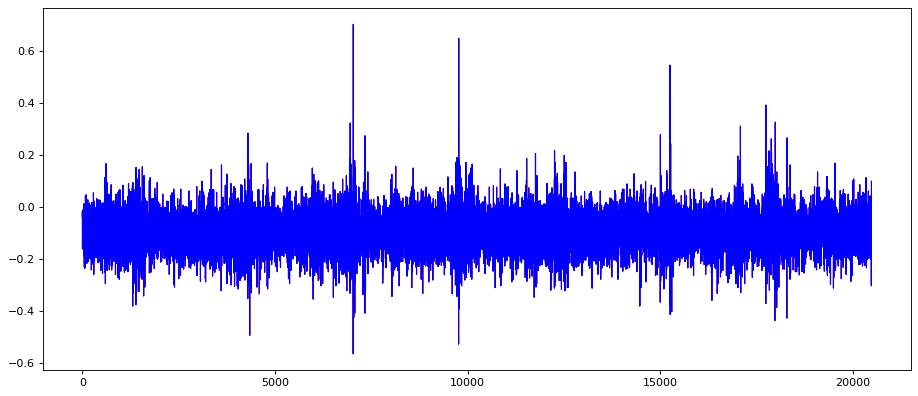

In [19]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,size), healthy_sample[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), healthy_sample[:,1], '-', color='blue', animated = True, linewidth=1)

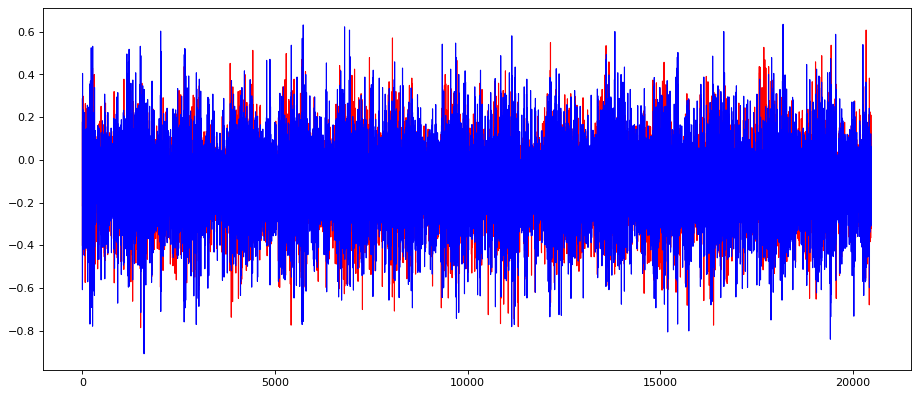

In [20]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(faulty_sample)
ax.plot(range(0,size), faulty_sample[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), faulty_sample[:,0], '-', color='blue', animated = True, linewidth=1)

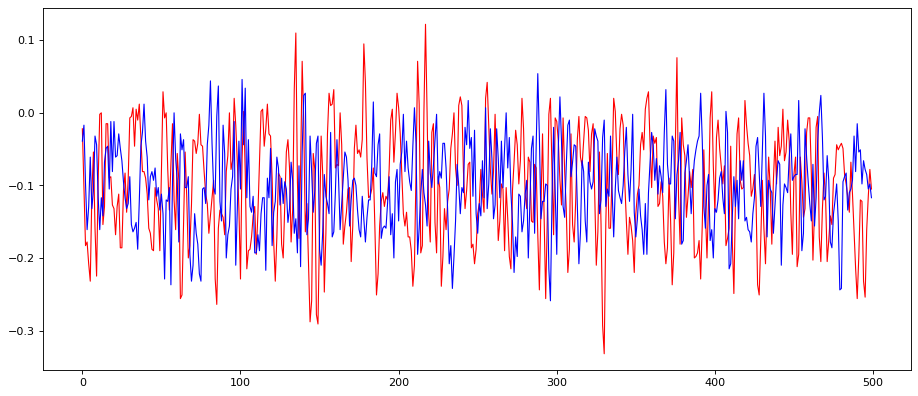

In [21]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), healthy_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), healthy_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

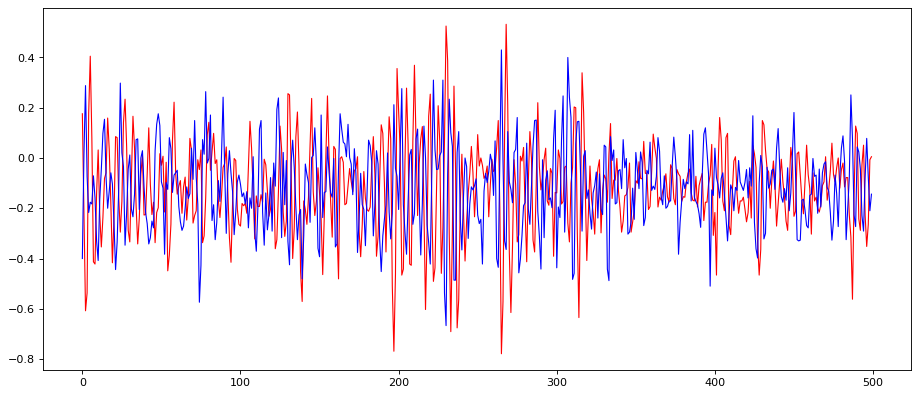

In [22]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), faulty_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), faulty_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

In [23]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [45]:
timesteps = 4
dim = 2
lossHistory = LossHistory()
# design network

model = Sequential()
model.add(LSTM(4,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')

def train(data):
    history=model.fit(data, data, epochs=20, batch_size=72, validation_data=(data, data), verbose=1, shuffle=False,callbacks=[lossHistory])
    return history.history['loss']

def score(data):
    yhat =  model.predict(data)
    return yhat

In [285]:
#some learners constantly reported 502 errors in Watson Studio. 
#This is due to the limited resources in the free tier and the heavy resource consumption of Keras.
#This is a workaround to limit resource consumption

#from keras import backend as K

#K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))
#K.set_session(K.tf.compat.v1.Session(config=K.tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [25]:
def create_trimmed_recording(df,file_id):
    recording = get_recording(df,file_id) 
    samples = len(recording)
    trim = samples % 100
    recording_trimmed = recording[:samples-trim]
    recording_trimmed.shape = (int((samples-trim)/timesteps),timesteps,dim)
    return recording_trimmed

In [26]:
#pd.unique()
#df_healthy.drop(0,1).drop(2,1).drop(3,1)
pd.unique(df_mix.iloc[:,1])

array([   1,    2,    3,    4,    5, 2152, 2153, 2154, 2155, 2156],
      dtype=int64)

In [68]:
file_ids = pd.unique(df_mix.iloc[:,1])
start = time.time()
training_loss= []
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_mix,file_id)
    print("Staring training on %s" % (file_id))
    loss_epoch= train(recording_trimmed)
    training_loss= training_loss + loss_epoch 
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
healthy_losses = lossHistory.losses

Staring training on 1
Epoch 1/20
71/71 [==============================] - 0s 5ms/step - loss: 8.4490e-04 - val_loss: 0.0020
Epoch 2/20
71/71 [==============================] - 0s 5ms/step - loss: 8.1870e-04 - val_loss: 6.2048e-04
Epoch 3/20
71/71 [==============================] - 0s 5ms/step - loss: 8.3639e-04 - val_loss: 0.0011
Epoch 4/20
71/71 [==============================] - 0s 5ms/step - loss: 8.1245e-04 - val_loss: 8.1899e-04
Epoch 5/20
71/71 [==============================] - 0s 5ms/step - loss: 4.6993e-04 - val_loss: 2.8128e-04
Epoch 6/20
71/71 [==============================] - 0s 5ms/step - loss: 4.3521e-04 - val_loss: 6.6301e-04
Epoch 7/20
71/71 [==============================] - 0s 5ms/step - loss: 4.8908e-04 - val_loss: 2.9664e-04
Epoch 8/20
71/71 [==============================] - 0s 5ms/step - loss: 2.7206e-04 - val_loss: 3.0503e-04
Epoch 9/20
71/71 [==============================] - 0s 5ms/step - loss: 3.5974e-04 - val_loss: 2.1527e-04
Epoch 10/20
71/71 [=============

In [69]:
#training_loss = history.history['loss']
#test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

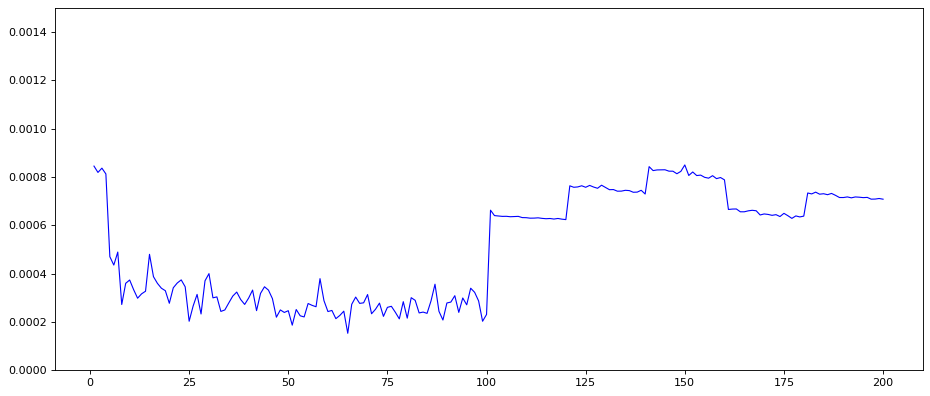

In [71]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.ylim(0,0.0015)
ax.plot(epoch_count, training_loss, '-', color='blue', animated = True, linewidth=1)